# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
file_path = "./data/ForeignGifts_edu.csv"
df = pd.read_csv(file_path)

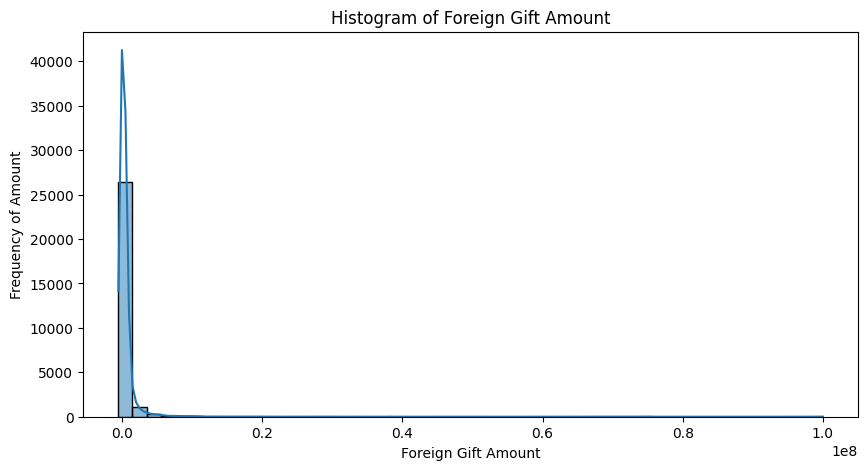

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Foreign Gift Amount'], bins=50, kde=True)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency of Amount')
plt.title('Histogram of Foreign Gift Amount')
plt.show()

The distribution is very right-skewed due to the presence of a couple of very large foreign gifts and lots of smaller valued foreign gifts are clustered in the lower value range.

Contract         61.209737
Monetary Gift    38.751285
Real Estate       0.038978
Name: Gift Type, dtype: float64


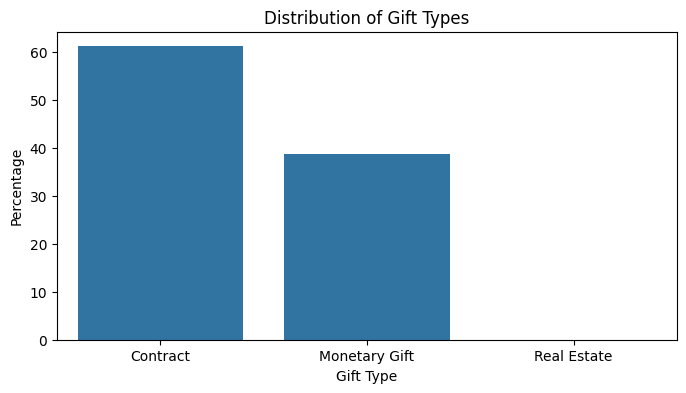

In [5]:
gift_type_counts = df['Gift Type'].value_counts(normalize=True) * 100
print(gift_type_counts)

plt.figure(figsize=(8, 4))
sns.barplot(x=gift_type_counts.index, y=gift_type_counts.values)
plt.xlabel('Gift Type')
plt.ylabel('Percentage')
plt.title('Distribution of Gift Types')
plt.show()

It appears almost none of these gifts are real-estate associated, while ~60% are contracts and ~40% are monetary gifts. 

/Users/chloe/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/chloe/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_47632/2881139665.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Log Foreign Gift Amount'], shade=True)


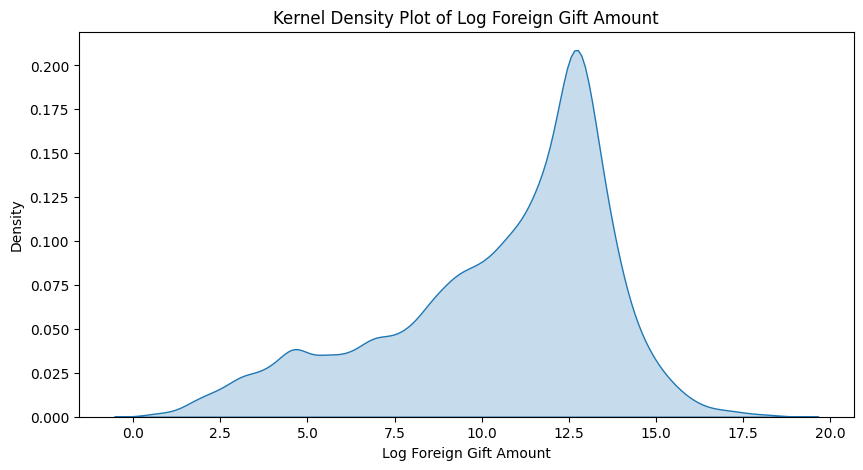

In [6]:
df['Log Foreign Gift Amount'] = np.log1p(df['Foreign Gift Amount'])

plt.figure(figsize=(10, 5))
sns.kdeplot(df['Log Foreign Gift Amount'], shade=True)
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.show()

/var/folders/_2/97vvhj716y1gb9rdp5lcq27m0000gn/T/ipykernel_47632/1127213336.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', shade=True)


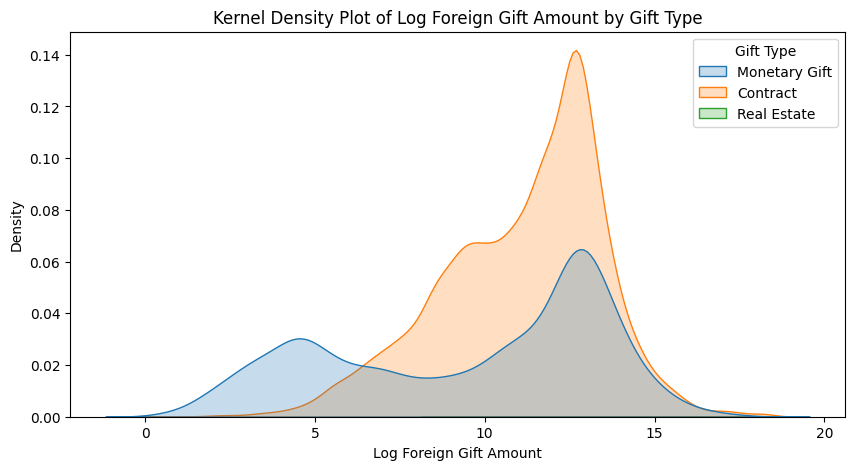

In [7]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type', shade=True)
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Foreign Gift Amount by Gift Type')
plt.show()

Taking the log transformation looks as if it helps normalize the skewed distribution we saw earlier. It seems like the overall log gifts are extremely similar to the log distribution of contract-related gifts, and it also seems like adding the three subsections together would result in the overall log gift distribution.

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64


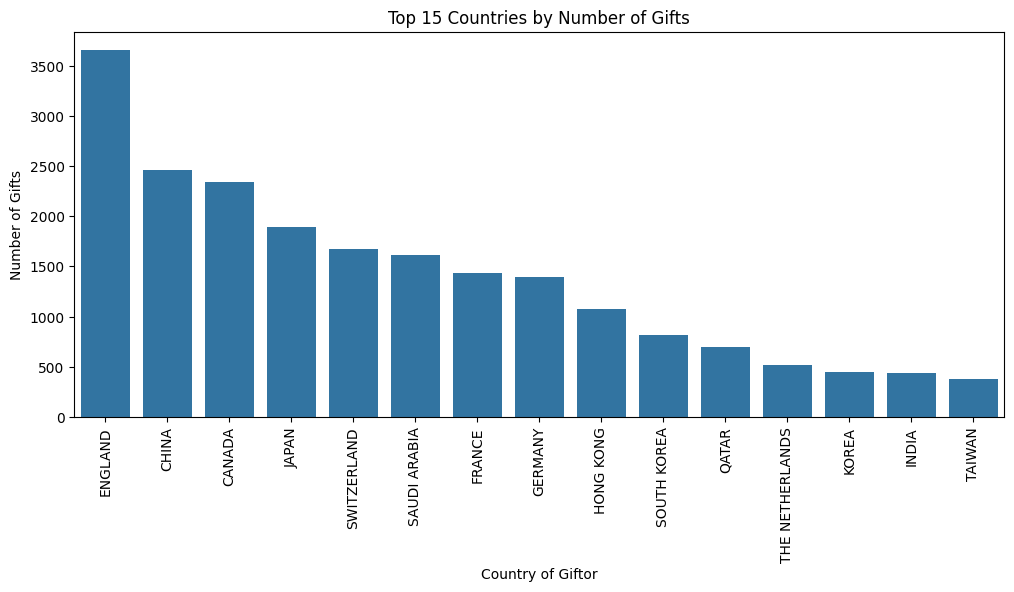

In [9]:
top_countries_count = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().nlargest(15)
print(top_countries_count)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries_count.index, y=top_countries_count.values)
plt.xticks(rotation=90)
plt.xlabel('Country of Giftor')
plt.ylabel('Number of Gifts')
plt.title('Top 15 Countries by Number of Gifts')
plt.show()

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


Text(0.5, 1.0, 'Top 15 Countries by Total Amount Given')

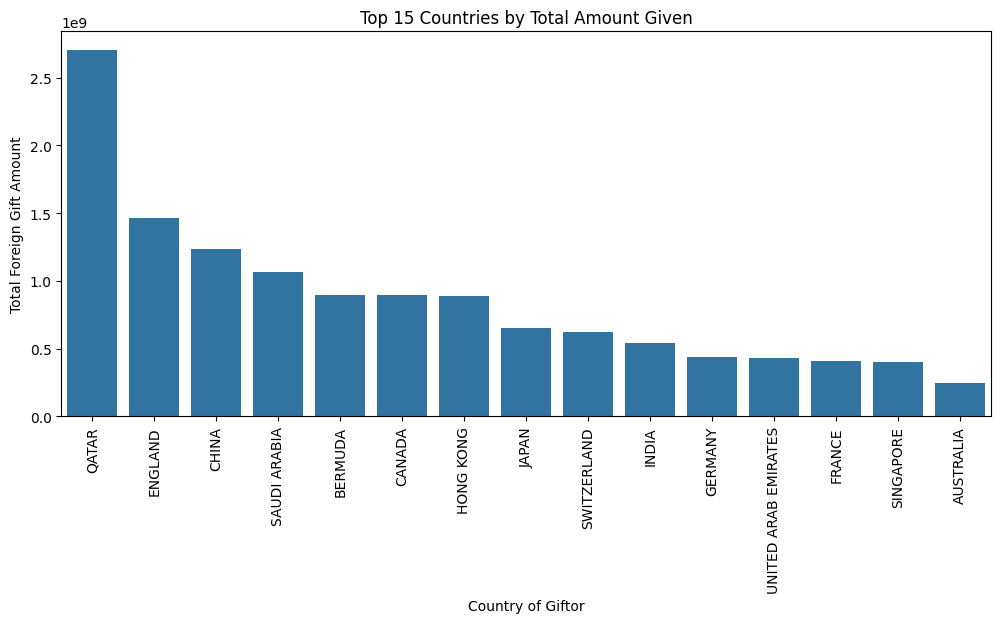

In [10]:
top_countries_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print(top_countries_amount)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries_amount.index, y=top_countries_amount.values)
plt.xticks(rotation=90)
plt.xlabel('Country of Giftor')
plt.ylabel('Total Foreign Gift Amount')
plt.title('Top 15 Countries by Total Amount Given')

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


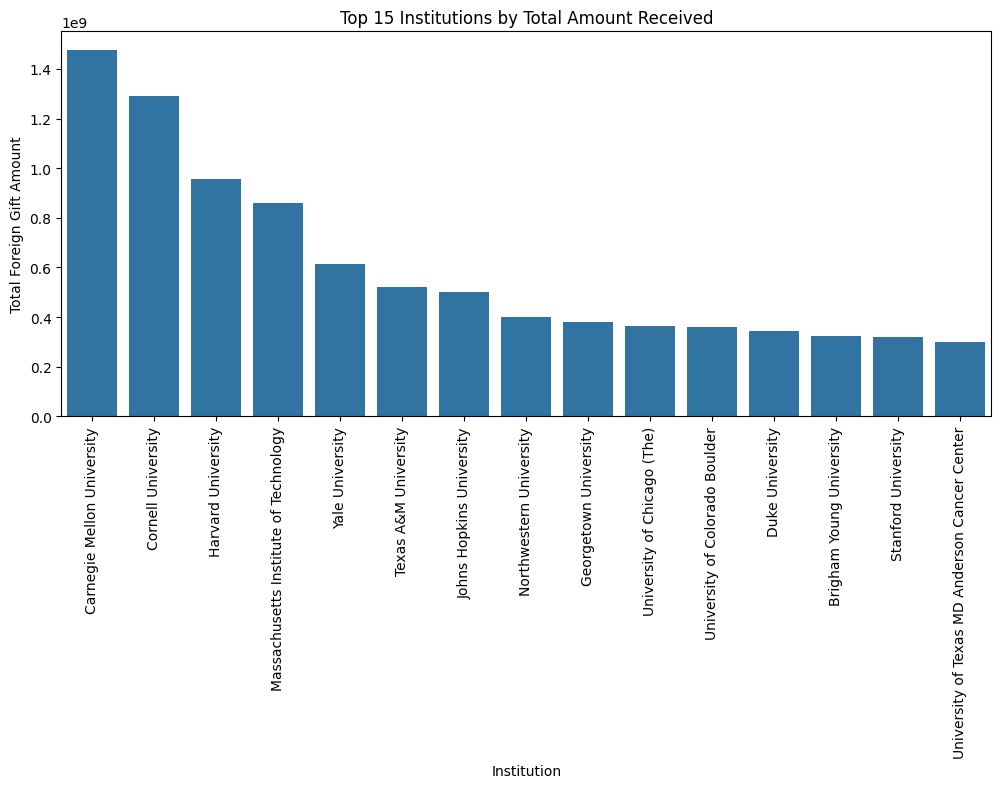

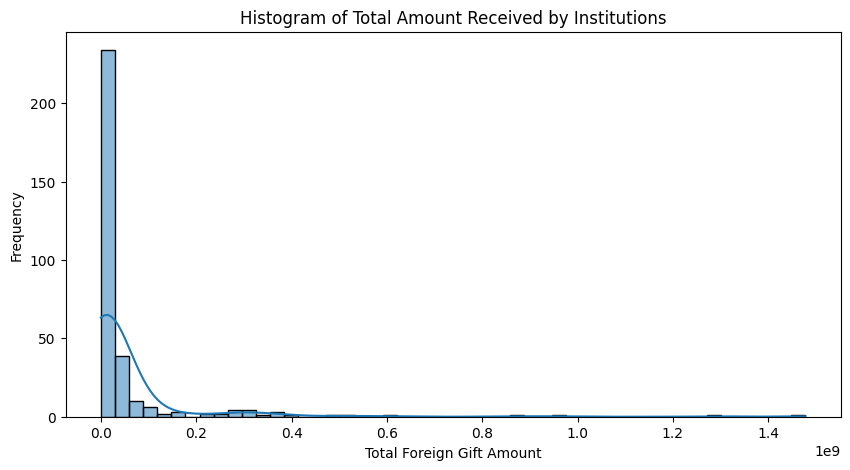

In [14]:
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_institutions)

institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_institutions.index, y=top_institutions.values)
plt.xticks(rotation=90)
plt.xlabel('Institution')
plt.ylabel('Total Foreign Gift Amount')
plt.title('Top 15 Institutions by Total Amount Received')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(institution_totals, bins=50, kde=True)
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Total Amount Received by Institutions')
plt.show()

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


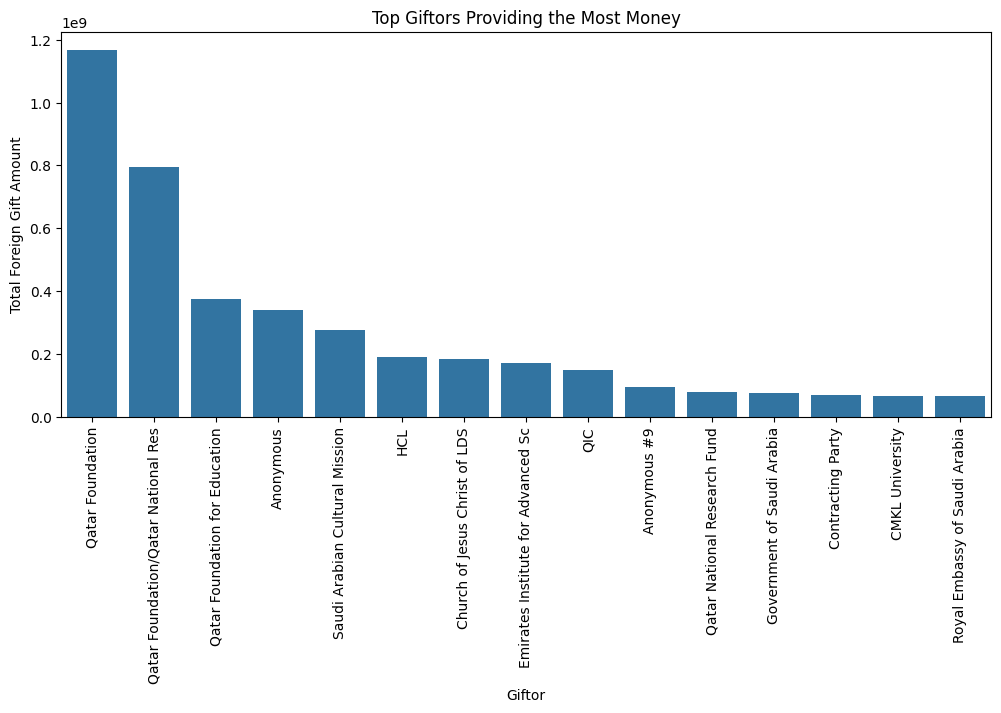

In [19]:
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_giftors)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_giftors.index, y=top_giftors.values)
plt.xticks(rotation=90)
plt.xlabel('Giftor')
plt.ylabel('Total Foreign Gift Amount')
plt.title('Top Giftors Providing the Most Money')
plt.show()